In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64,64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten()) 
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0

In [4]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
batch_size = 16
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        #horizontal_flip=True
        )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'Dataset/train', 
        target_size=(64,64), 
        batch_size=batch_size,
        class_mode='binary')  

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'Dataset/valid',
        target_size=(64,64),
        batch_size=batch_size,
        class_mode='binary')

Found 3019 images belonging to 2 classes.
Found 1455 images belonging to 2 classes.


In [5]:
history1=model.fit_generator(
        train_generator,
        steps_per_epoch=3019// batch_size,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=1455 // batch_size)

Epoch 1/30
188/188 [==============================] - 10s 51ms/step - loss: 0.6845 - acc: 0.5758 - val_loss: 0.7045 - val_acc: 0.3667
Epoch 2/30
188/188 [==============================] - 9s 46ms/step - loss: 0.6647 - acc: 0.6084 - val_loss: 0.6729 - val_acc: 0.5403
Epoch 3/30
188/188 [==============================] - 8s 45ms/step - loss: 0.6158 - acc: 0.6627 - val_loss: 0.6269 - val_acc: 0.6674
Epoch 4/30
188/188 [==============================] - 8s 45ms/step - loss: 0.5533 - acc: 0.7146 - val_loss: 0.6895 - val_acc: 0.5806
Epoch 5/30
188/188 [==============================] - 8s 45ms/step - loss: 0.5325 - acc: 0.7356 - val_loss: 0.5689 - val_acc: 0.7042
Epoch 6/30
188/188 [==============================] - 8s 44ms/step - loss: 0.5198 - acc: 0.7529 - val_loss: 0.6541 - val_acc: 0.6354
Epoch 7/30
188/188 [==============================] - 8s 44ms/step - loss: 0.4841 - acc: 0.7692 - val_loss: 0.6489 - val_acc: 0.6222
Epoch 8/30
188/188 [==============================] - 8s 44ms/step -

In [6]:
classes = train_generator.class_indices    
print(classes)

{'accident': 0, 'no_accident': 1}


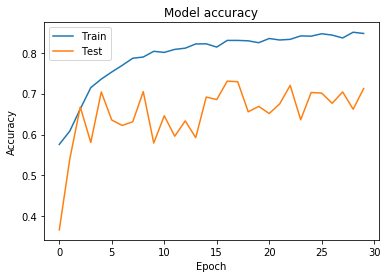

In [12]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
import numpy as np
import datetime
import cx_Oracle
import time,cv2
import smtplib
timestap={}
try: 
    con = cx_Oracle.connect('trinadh/trinadh9533@localhost') 
    cursor = con.cursor() 
    while True:
        cursor.execute('select * from LocationDetails')
        for column_1, column_2, column_3,column_4 in cursor.fetchall():
            video=cv2.VideoCapture(column_1)
            ip=column_1
            time=datetime.datetime.now()
            while True:
                check,frame=video.read()    
                img = cv2.resize(frame,(64,64))
                gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
                cv2.imwrite('G:/4-4 final project/opencv test/output/gray.jpg',gray)
                img=cv2.imread('G:/4-4 final project/opencv test/output/gray.jpg')
                img = cv2.resize(img,(64,64))
                img = image.img_to_array(img)
                img = np.expand_dims(img, axis = 0)
                classes =model.predict_classes(img)
                if classes[0][0]==0:
                    stop=datetime.datetime.now() + datetime.timedelta(minutes = 10)
                    if ip in timestap.keys():
                        if timestap[ip]<=time:
                            del timestap[ip]
                            print("Accident")
                            s="Location :"+column_2
                            rec=column_3
                            to="To: "+rec
                            msg = "\r\n".join([
                              "From: venkyvenky9533@gmail.com",
                              to,
                              "Subject: Alert!, Accident Occurred",
                              "",
                              s
                              ])
                            username = 'venkyvenky9533@gmail.com'
                            password = ''
                            server = smtplib.SMTP('smtp.gmail.com:587')
                            server.ehlo()
                            server.starttls()
                            server.login(username,password)
                            server.sendmail(username, rec, msg)
                            server.quit()
                    else:
                        print("Accident")
                        timestap[ip]=stop
                        s="Location :"+column_2
                        rec=column_3
                        to="To: "+rec
                        msg = "\r\n".join([
                          "From: venkyvenky9533@gmail.com",
                          to,
                          "Subject: Alert!, Accident Occurred",
                          "",
                          s
                          ])
                        username = 'venkyvenky9533@gmail.com'
                        password = 'venkyvenky9533'
                        server = smtplib.SMTP('smtp.gmail.com:587')
                        server.ehlo()
                        server.starttls()
                        server.login(username,password)
                        server.sendmail(username, rec, msg)
                        server.quit()
                else:
                    print(" No Accident")
    cursor.close()
    con.close()
except Exception as e: 
    print("There is a problem with Oracle", e)

 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident

 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident
 No Accident


KeyboardInterrupt: 

In [11]:
video.release()